In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
pd.set_option('display.max_rows', 1000)

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

sns.set(style = "darkgrid")

In [31]:
V_url = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv"
df_Vacc = pd.read_csv(V_url)
df_Vacc.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30
0,4.0,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.9391,67.7100,...,6355931.0,6355931.0,6355931.0,6355931.0,6355931.0,6355931.0,6408475.0,6408475.0,6408475.0,6408475.0
1,8.0,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.1533,20.1683,...,2883079.0,2883079.0,2883079.0,2883079.0,2883079.0,2883079.0,2898881.0,2898881.0,2898881.0,2898881.0
2,12.0,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.0339,1.6596,...,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0,15205854.0
3,20.0,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.5063,1.5218,...,153072.0,153072.0,153072.0,153072.0,153072.0,153072.0,153177.0,153177.0,153177.0,153177.0
4,24.0,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.2027,17.8739,...,19486927.0,19486927.0,19486927.0,19486927.0,19486927.0,19486927.0,19486927.0,19565024.0,19565024.0,19565024.0


In [32]:
df_Vacc['Country_Region'].nunique()

190

In [33]:
V_countries = ['Italy', 'US', 'Canada']

In [34]:
time_index = df_Vacc.columns[12:]
df_Vplot = pd.DataFrame({'date':time_index})
df_Vplot

,date
0,2020-12-12
1,2020-12-13
2,2020-12-14
3,2020-12-15
4,2020-12-16
...,...
561,2022-06-26
562,2022-06-27
563,2022-06-28
564,2022-06-29


In [35]:

for each in V_countries:
    df_Vplot[each] = np.array(df_Vacc[df_Vacc['Country_Region'] == each].iloc[:, 12::].max())
df_Vplot[each]

0             0.0
1             0.0
2             5.0
3           723.0
4          3023.0
          ...    
561    86173422.0
562    86173422.0
563    86173422.0
564    86173422.0
565    86256122.0
Name: Canada, Length: 566, dtype: float64

In [36]:
df_Vplot

,date,Italy,US,Canada
0,2020-12-12,0.0,0.0,0.0
1,2020-12-13,0.0,0.0,0.0
2,2020-12-14,0.0,50.0,5.0
3,2020-12-15,0.0,1058.0,723.0
4,2020-12-16,0.0,12835.0,3023.0
...,...,...,...,...
561,2022-06-26,138194651.0,591329145.0,86173422.0
562,2022-06-27,138211298.0,591331270.0,86173422.0
563,2022-06-28,138231220.0,591332073.0,86173422.0
564,2022-06-29,138251239.0,591377787.0,86173422.0


In [37]:
for each in V_countries:
    df_Vplot[each+" % vaccinated"] =(100/3)*(df_Vplot[each])/(df_Vacc[df_Vacc['Country_Region']== each]['Population'].max())
# Considering 3-doeses as a metric of complete vaccination
df_Vplot

,date,Italy,US,Canada,Italy % vaccinated,US % vaccinated,Canada % vaccinated
0,2020-12-12,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2020-12-13,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2020-12-14,0.0,50.0,5.0,0.000000,0.000005,0.000004
3,2020-12-15,0.0,1058.0,723.0,0.000000,0.000107,0.000637
4,2020-12-16,0.0,12835.0,3023.0,0.000000,0.001299,0.002662
...,...,...,...,...,...,...,...
561,2022-06-26,138194651.0,591329145.0,86173422.0,76.188374,59.826976,75.878857
562,2022-06-27,138211298.0,591331270.0,86173422.0,76.197552,59.827191,75.878857
563,2022-06-28,138231220.0,591332073.0,86173422.0,76.208535,59.827273,75.878857
564,2022-06-29,138251239.0,591377787.0,86173422.0,76.219572,59.831898,75.878857


* Validation of continuous and clean data for anomalies detection

In [38]:
import missingno as msno

<AxesSubplot:>

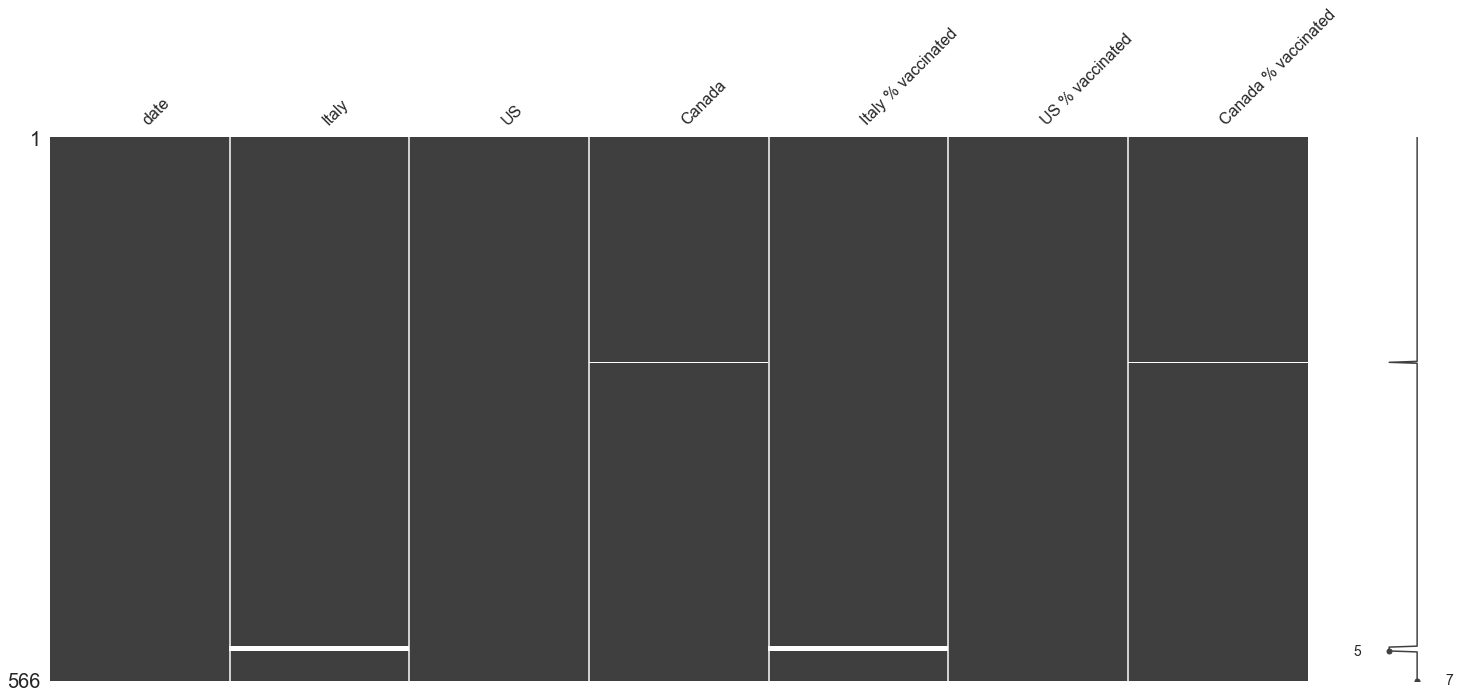

In [39]:
msno.matrix(df_Vplot)

<AxesSubplot:>

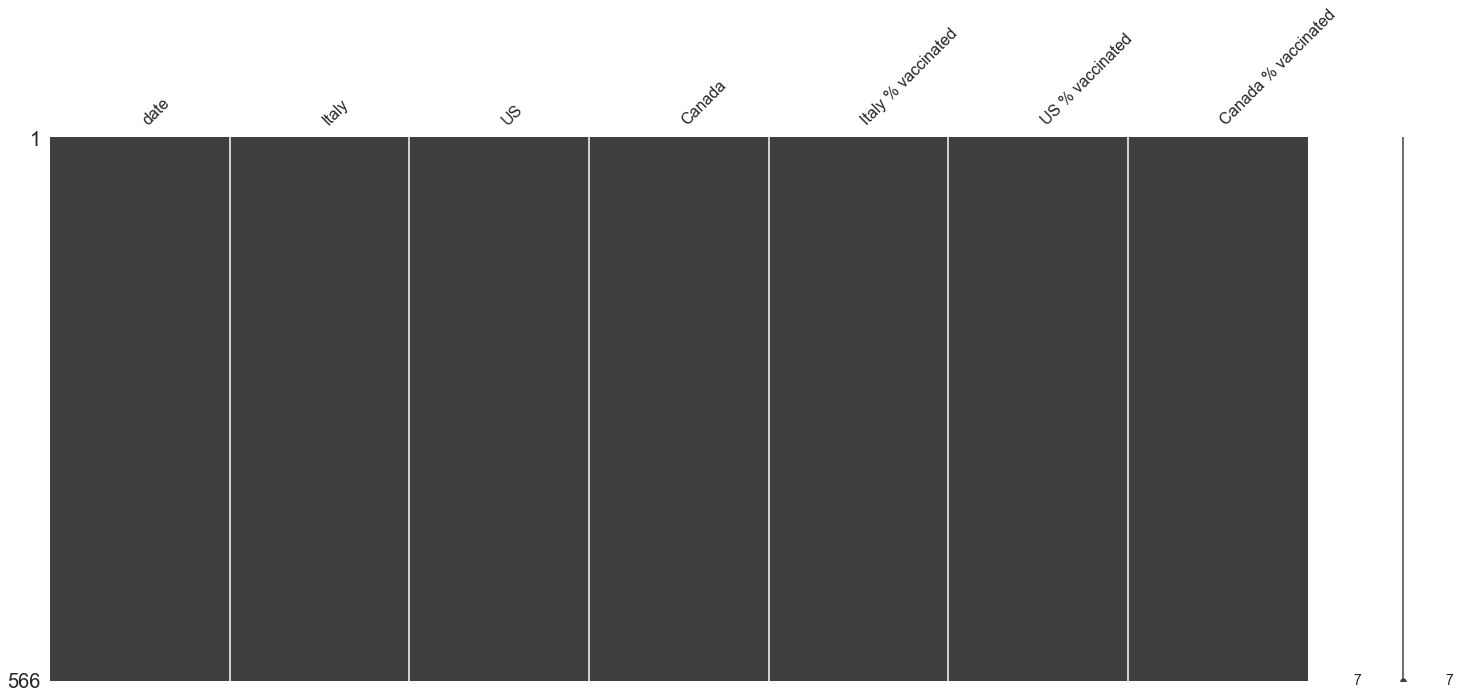

In [40]:
df_Vplot.interpolate(method = 'linear', limit_direction = 'backward', inplace = True)
msno.matrix(df_Vplot)

In [41]:
fig = go.Figure()

# definition of plotting individual trace
for each in V_countries:
    fig.add_trace(go.Scatter(x = df_Vplot.date, 
                             y = df_Vplot[each+" % vaccinated"], 
                             mode = 'markers+lines',
                             opacity =0.9,
                             name =each, 
                             line_width = 2, 
                             marker_size =4
                            )
                 )
    
# layout inputs
fig.update_layout(xaxis_title = "Time", 
                  yaxis_title = "Percentage_of_Vaccinated_Population (source johns hopkins csse, log-scale",
                  width = 1920, 
                  height = 1080)

# fig.update_yaxes(type = 'log', range = [1.1, 9])
# fig.update_layout(xaxis_rangeslider_visible = True)
# fig.show(renderer = 'chrome')
fig.update_layout(title_text="Percentage_of_Vaccinated_population")
fig.show()

In [42]:
fig.write_image('Percentage_of_Vaccinated_population.jpeg')    # for exporting the image in jpeg format 

In [43]:
import dash 
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id = 'country_drop_down',
        options = [
            {'label': 'Italy', 'value':'Italy'},
            {'label': 'US', 'value':'US'},
            {'label': 'Spain', 'value':'Spain'},
            {'label': 'Germany', 'value':'Germany'},
            {'label': 'India', 'value':'India'},
            {'label': 'Canada', 'value':'Canada'},
            {'label': 'Russia', 'value':'Russia'},
            {'label': 'Switzerland', 'value':'Switzerland'}
        ], 
        value = ['US', 'Germany'], 
        multi = True 
    ), 
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
   
    traces = []
    for each in country_list:
        traces.append(dict(x = df_Vplot.date,
                           y = df_Vplot[each+" % vaccinated"],
                           mode = 'markers+lines',
                           opacity = 0.8,
                           line_width = 2,
                           marker_size = 4,
                           name = each))
    
    
    return{
        'data':traces,
        'layout': dict (
                width= 1980,
                height=1080,
                xaxis_title="Time",
                yaxis_title="Confirmed Infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"linear",
                       'range':'[1.1,9]'
                      }
        )
    }


In [ ]:
app.run_server(debug = True, use_reloader = False)